In [40]:
# Import libraries and load Data

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# Define the path for th excel file
file_path = r"C:\Users\A.W\Downloads\projects\POWER BI\Customer Churn Analysis\Prediction_Data.xlsx"


# Define the sheet_name to read data from

sheet_name = "vw_ChurnData"


# Read the data from the specified sheet into pandas DataFrame
data = pd.read_excel(file_path,sheet_name=sheet_name)


#Display the first few rows of the fetched data
print(data.head())

  Customer_ID  Gender  Age Married      State  Number_of_Referrals  \
0   56174-RAJ  Female   71      No  Rajasthan                   13   
1   56177-KAR    Male   51     Yes  Karnataka                    5   
2   56185-HAR    Male   40     Yes    Haryana                   15   
3   56211-DEL  Female   20      No      Delhi                    5   
4   56229-ASS    Male   48     Yes      Assam                    8   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 4     Deal 1           Yes            Yes  ...   
1                11        NaN           Yes            Yes  ...   
2                 1        NaN           Yes            Yes  ...   
3                 3     Deal 1           Yes            Yes  ...   
4                31     Deal 3           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      89.599998   6127.600098      0.000000   
1  Bank Withdrawal      67.800003   4804

In [49]:
# Data Preprocessing
# Drop columns that won't be used in the prediction
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

In [50]:
# List of columns to be label Encoded
# columns to convert into numerical values
columns_to_encode = [
    'Gender','Married','State','Value_Deal','Phone_Service','Multiple_Lines',
    'Internet_Service','Internet_Type','Online_Security','Online_Backup',
    'Device_Protection_Plan','Premium_Support','Streaming_TV','Streaming_Movies',
    'Streaming_Music','Unlimited_Data','Contract','Paperless_Billing',
    'Payment_Method'
]

# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])
    
    
# Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

# Split data into features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [51]:
# Train Random Forest Model
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Confusion Matrix:
[[795  58]
 [119 230]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       853
           1       0.80      0.66      0.72       349

    accuracy                           0.85      1202
   macro avg       0.83      0.80      0.81      1202
weighted avg       0.85      0.85      0.85      1202



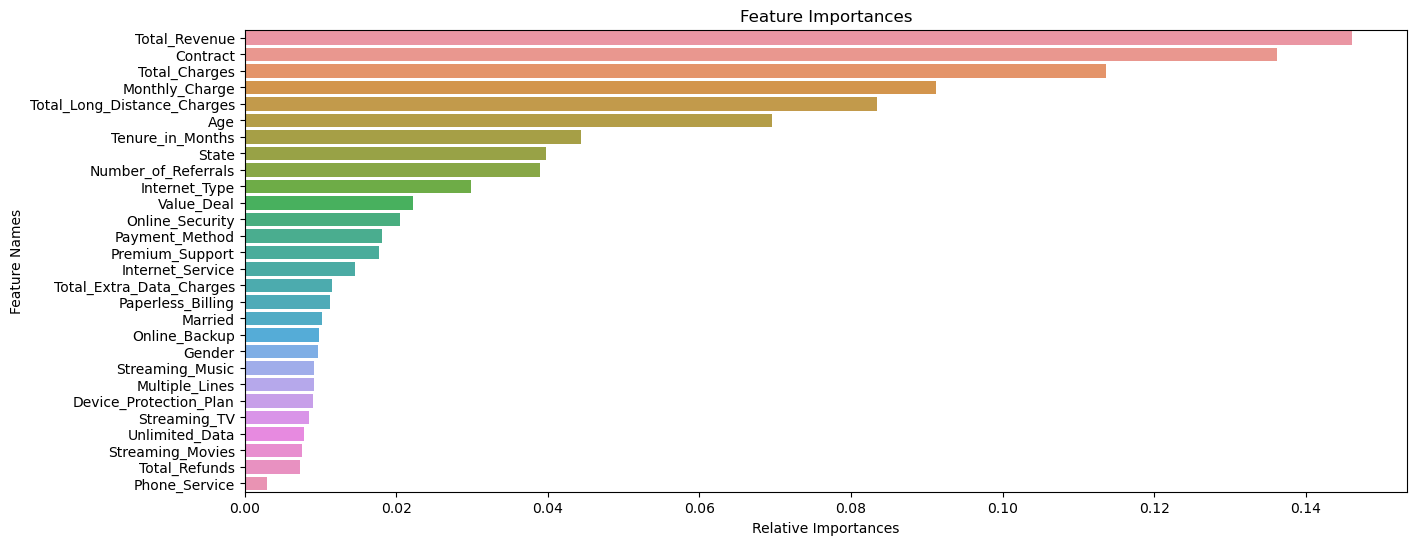

In [52]:
# Evaluate the model
# Make predictions
y_pred = rf_model.predict(X_test)


# Evaluate the model
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Feature selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1] # sorting features into highest to lowest

# Plot the features importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importances')
plt.ylabel('Feature Names')
plt.show()

In [56]:
# Predicting on a New Data
# Define the path for the Joiner data excel file
file_path = r"C:\Users\A.W\Downloads\projects\POWER BI\Customer Churn Analysis\Prediction_Data.xlsx"

# Define the sheet_name to read data from

sheet_name = "vw_JoinData"
# Read the data from the specified sheet into pandas DataFrame
new_data = pd.read_excel(file_path,sheet_name=sheet_name)

#Display the first few rows of the fetched data
print(new_data.head())

  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   56256-UTT    Male   40      No   Uttar Pradesh                   14   
1   62359-AND  Female   48     Yes  Andhra Pradesh                    5   
2   62497-BIH  Female   20      No           Bihar                    0   
3   63883-KAR  Female   33     Yes       Karnataka                   12   
4   65405-MAH  Female   65     Yes     Maharashtra                    7   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                15        NaN           Yes             No  ...   
1                24     Deal 5            No             No  ...   
2                 2     Deal 5           Yes             No  ...   
3                26        NaN           Yes             No  ...   
4                18        NaN           Yes             No  ...   

  Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0    Credit Card      70.300003    220.399994           0.0   
1    Credit Ca

In [57]:
# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()

# Retaining the Customer_ID column
customer_ids = new_data['Customer_ID']

# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)


# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])
    
# Make predictions
new_predictions = rf_model.predict(new_data)

# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data["Customer_Status_Predicted"] == 1]


# Save the results
original_data.to_csv(r"C:\Users\A.W\Downloads\projects\POWER BI\Customer Churn Analysis\Prediction_Data.csv")